In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import folium
from sklearn import preprocessing
import geopandas as gpd
import matplotlib.colors as colors
import matplotlib.colors as colors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#from helpers import *
from ipywidgets import SelectMultiple, RadioButtons, interact, Layout
%load_ext autoreload
%autoreload 2

## Trade Network

In [2]:
import networkx as nx

In [33]:
mat = pd.read_pickle("pickle/trade_matrix.pkl")

In [60]:
china = mat[(mat.reset_index().From=='China').values]

In [62]:
china = china.sort_values(['Value'], ascending=False)

In [69]:
countries = set(mat.reset_index().From.values).union(mat.reset_index().To.values)

In [7]:
G = nx.DiGraph()

In [8]:
G.add_nodes_from(countries)

In [9]:
G.add_weighted_edges_from(mat.reset_index().values)

C:\Users\Francesco\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Francesco\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


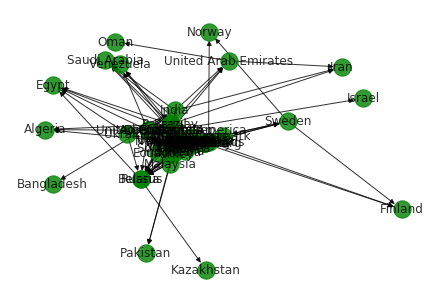

In [10]:
nx.draw(G, with_labels=True,  node_color='g', alpha = 0.8)

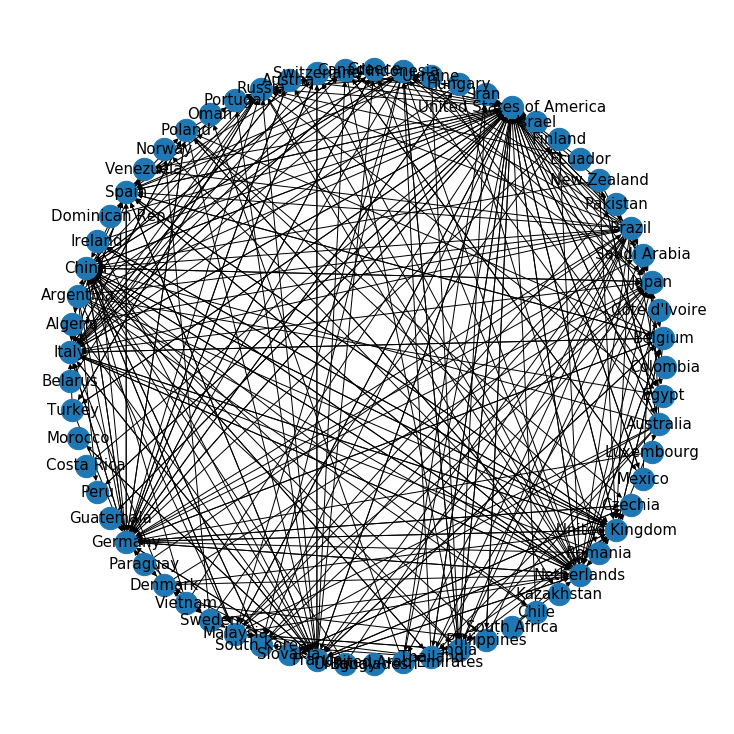

In [11]:
pos = nx.circular_layout(G)
plt.figure(1,figsize=(10,10)) 
nx.draw(G,pos,with_labels=True,node_size=500,font_size=15) 
plt.show()

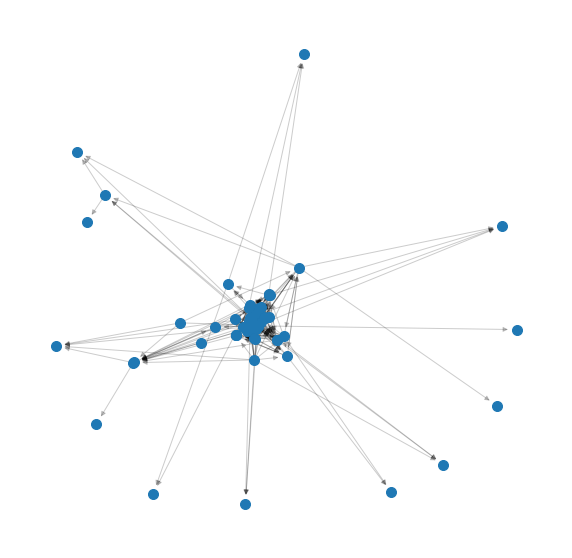

In [12]:
plt.figure(1,figsize=(10,10)) 
pos = nx.spring_layout(G,k=0.2)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), with_labels=True, node_size=100, cmap=plt.cm.jet)
plt.axis('off')
plt.show()

In [13]:
sum_from = mat.groupby('From').sum()
sum_to = mat.groupby('To').sum()
tot = sum_from.merge(sum_to.Value, how='outer', left_index=True, right_index=True).sum(axis=1).sort_values(ascending=False)
#color = tot.divide(tot.max())

In [14]:
nx.set_node_attributes(G, tot, 'Total')

In [17]:
m = max([G[u][v]['weight'] for u,v in G.edges()])
#[G[u][v]['weight']/m*100 for u,v in G.edges()]

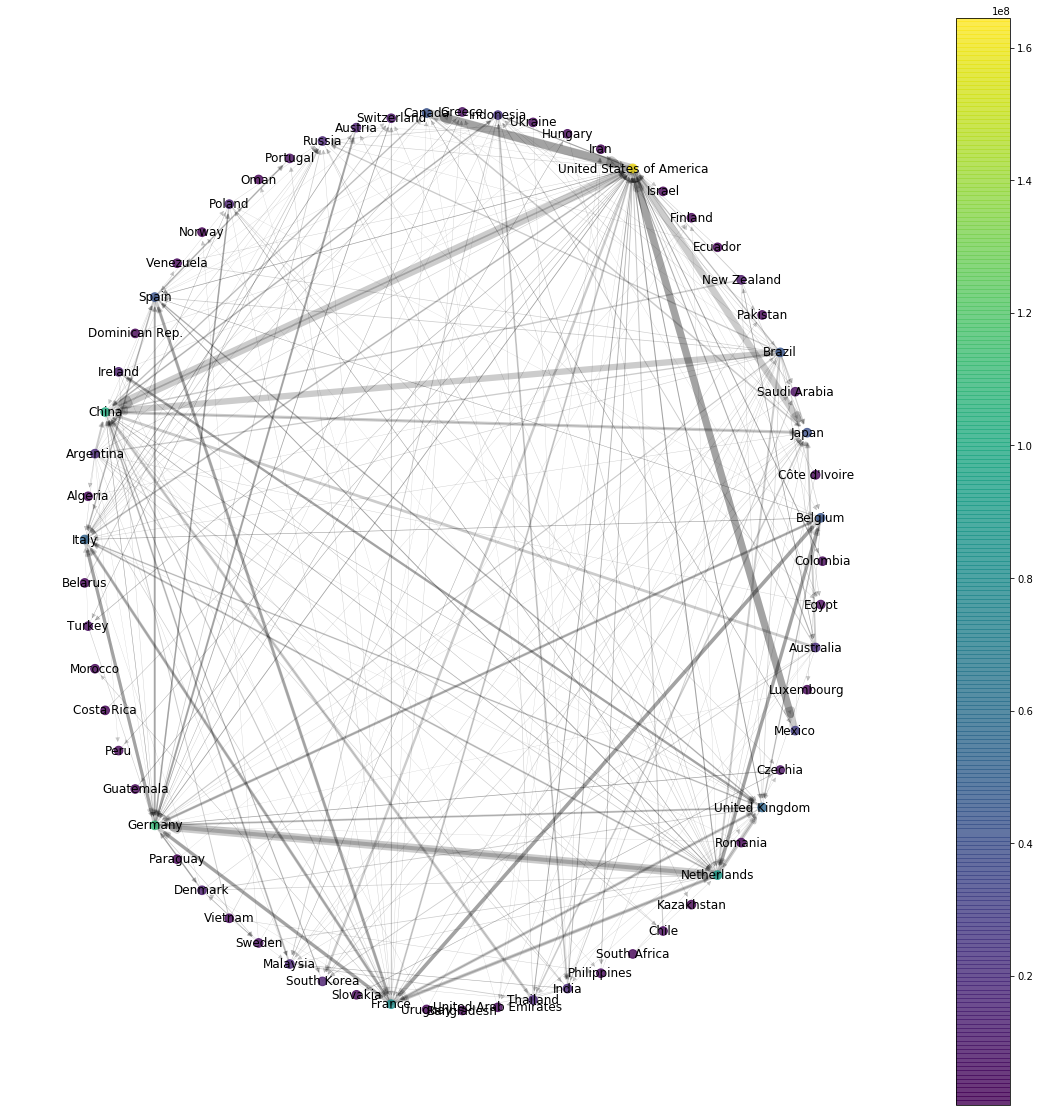

In [72]:
plt.figure(figsize=(20,20)) 
pos = nx.circular_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha=0.2,edgelist=G.edges(), width=[G[u][v]['weight']/m*10 for u,v in G.edges()], with_labels=True)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), with_labels=True, node_color=[G.nodes[n]["Total"] for n in G.nodes()], 
                             alpha=0.8, node_shape = '.')
labels = nx.draw_networkx_labels(G,pos)
plt.colorbar(nc)
plt.axis('off')
plt.show()

In [ ]:
colors = [G[u][v]['weight'] for u,v in G.edges()]

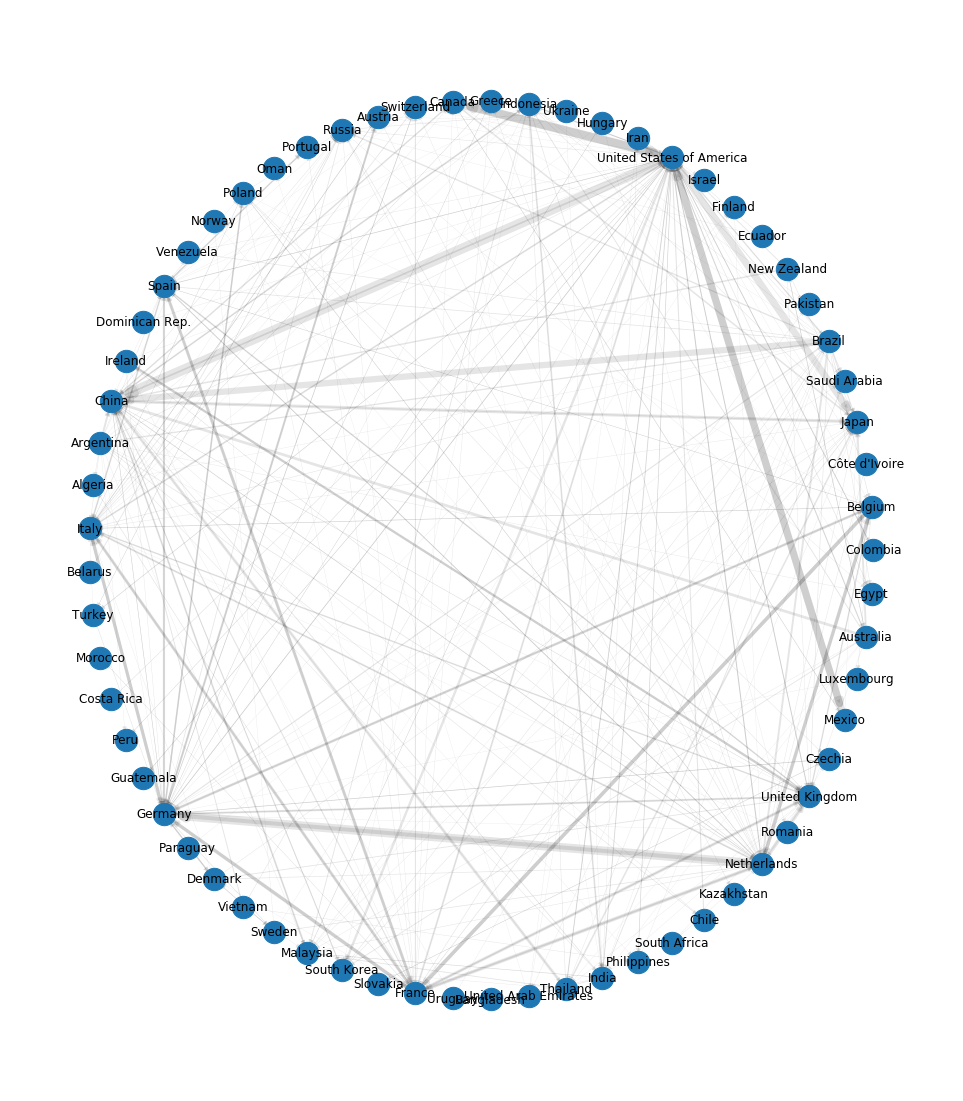

In [19]:
plt.figure(1,figsize=(17,20)) 
pos = nx.circular_layout(G)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), with_labels=True, node_size=500, cmap=plt.cm.jet)
ec = nx.draw_networkx_edges(G, pos, alpha=0.1,edgelist=G.edges(), width=[G[u][v]['weight']/m*10 for u,v in G.edges()], with_labels=True)
labels=nx.draw_networkx_labels(G,pos, font_color='k')
#plt.colorbar(ec)
plt.axis('off')
plt.show()